In [2]:
import cv2
import matplotlib.pyplot as plt
import yaml
import numpy as np
import os
import glob
%matplotlib inline

# Load image of field

In [43]:
img = cv2.imread("imgs/img_with_diod3.png")
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

# Test calibration

In [15]:
K=np.array([[543.107811968841, 0.0, 630.7227631662455], [0.0, 540.0320855865099, 486.5749791589516], [0.0, 0.0, 1.0]])
D=np.array([[-0.05195582161040964], [-0.009477421485536482], [0.010893416415594874], [-0.005379345567357744]])
def eulerAnglesToRotationMatrix(theta):
    R_x = np.array([[1, 0, 0], [0, np.cos(theta[0]), -np.sin(theta[0])],
                    [0, np.sin(theta[0]),
                     np.cos(theta[0])]])
    R_y = np.array([[np.cos(theta[1]), 0,
                     np.sin(theta[1])], [0, 1, 0],
                    [-np.sin(theta[1]), 0,
                     np.cos(theta[1])]])
    R_z = np.array([[np.cos(theta[2]), -np.sin(theta[2]), 0],
                    [np.sin(theta[2]), np.cos(theta[2]), 0], [0, 0, 1]])
    R = np.dot(R_z, np.dot(R_y, R_x))
    return R

rotation_matrix = eulerAnglesToRotationMatrix((3 * np.pi / 4 + 0.2, 0, 0))
camera_position = np.array([[1500, 0, 1000]]).T
t = -rotation_matrix.dot(camera_position)
M = np.concatenate((rotation_matrix, t), axis=1)
L = np.array([[2.34, 0, 0], [0, -2.08, 2000], [0, 0, 0], [0, 0, 1]])
K_new = np.linalg.inv(M.dot(L)) * 10 ** 3
T = np.array([[  7.72128582e-01,  -4.89107631e-02,   1.25099533e+02],
       [ -5.58640771e-02,   7.94615984e-01,   1.35127960e+02],
       [ -9.73771967e-05,  -4.64651494e-05,   1.00000000e+00]])
K_opt = T.dot(K_new)

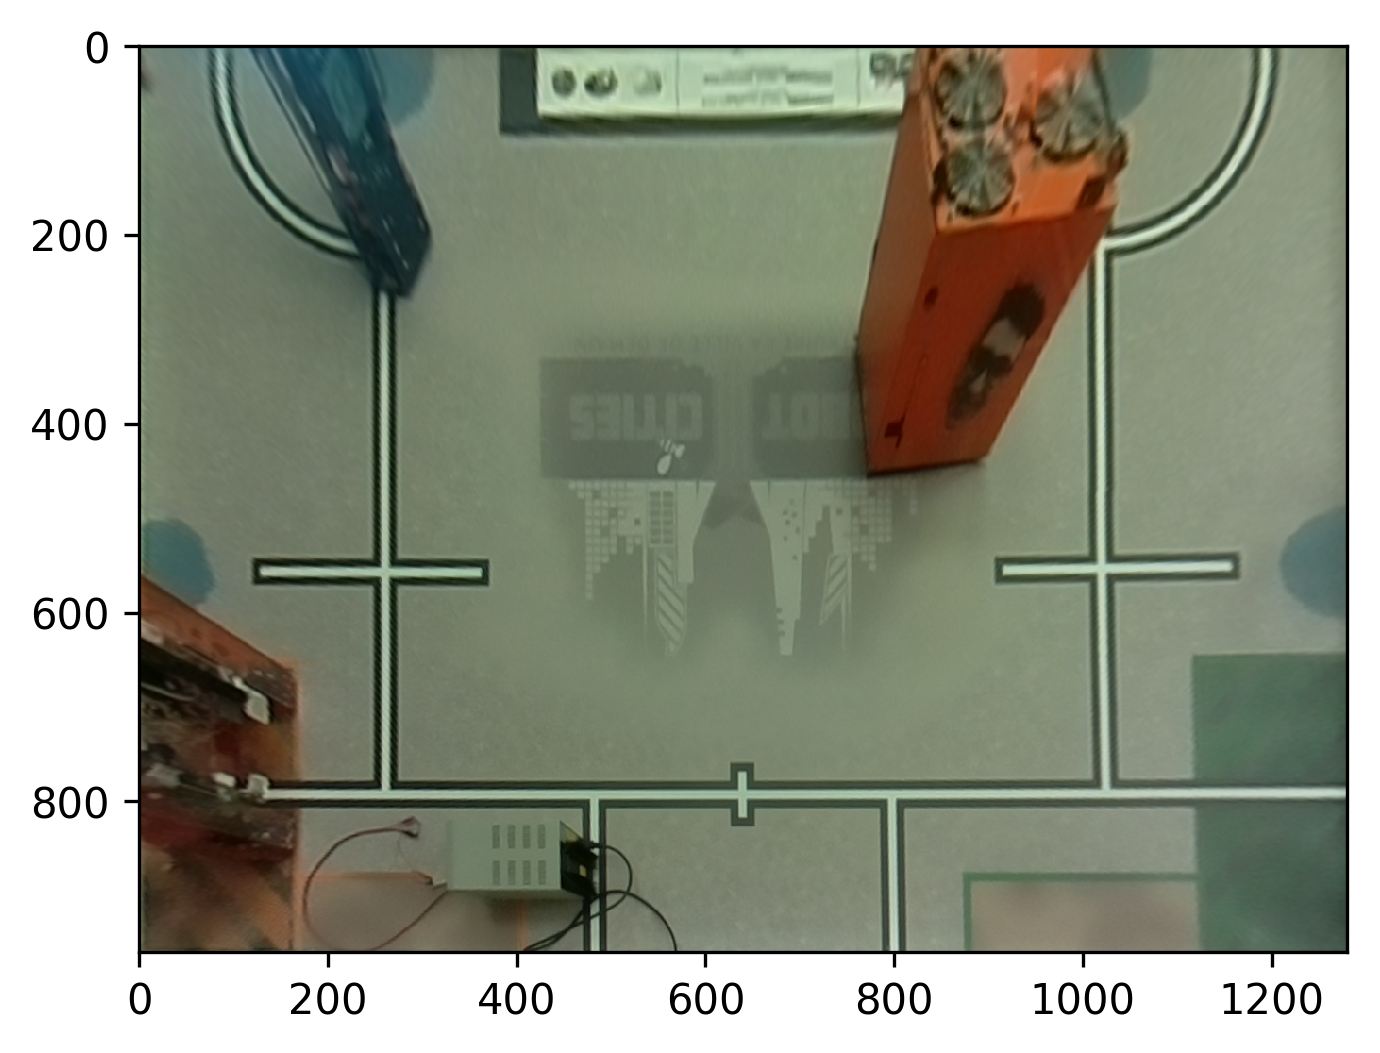

In [16]:
field_img = cv2.fisheye.undistortImage(img, K, D, Knew = K_opt)
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
plt.imshow(cv2.cvtColor(field_img, cv2.COLOR_RGB2BGR))

# Img on 400 mm

In [17]:
L = np.array([[2.34, 0, 0], [0, -2.08, 2000], [0, 0, 450], [0, 0, 1]])
K_d = T.dot(np.linalg.inv(M.dot(L)) * 10 ** 3)

In [44]:
img_d = cv2.fisheye.undistortImage(img, K, D, Knew = K_d)
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
plt.imshow(cv2.cvtColor(img_d, cv2.COLOR_RGB2BGR))

# Img processing

In [45]:
# img_11 = np.sum(img_d, axis=2) / 3
img_1 = cv2.cvtColor(img_d, cv2.COLOR_RGB2HSV)[:,:,2]
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
ax.imshow(img_1, cmap="gray")
# ax[1].imshow(img_11, cmap="gray")

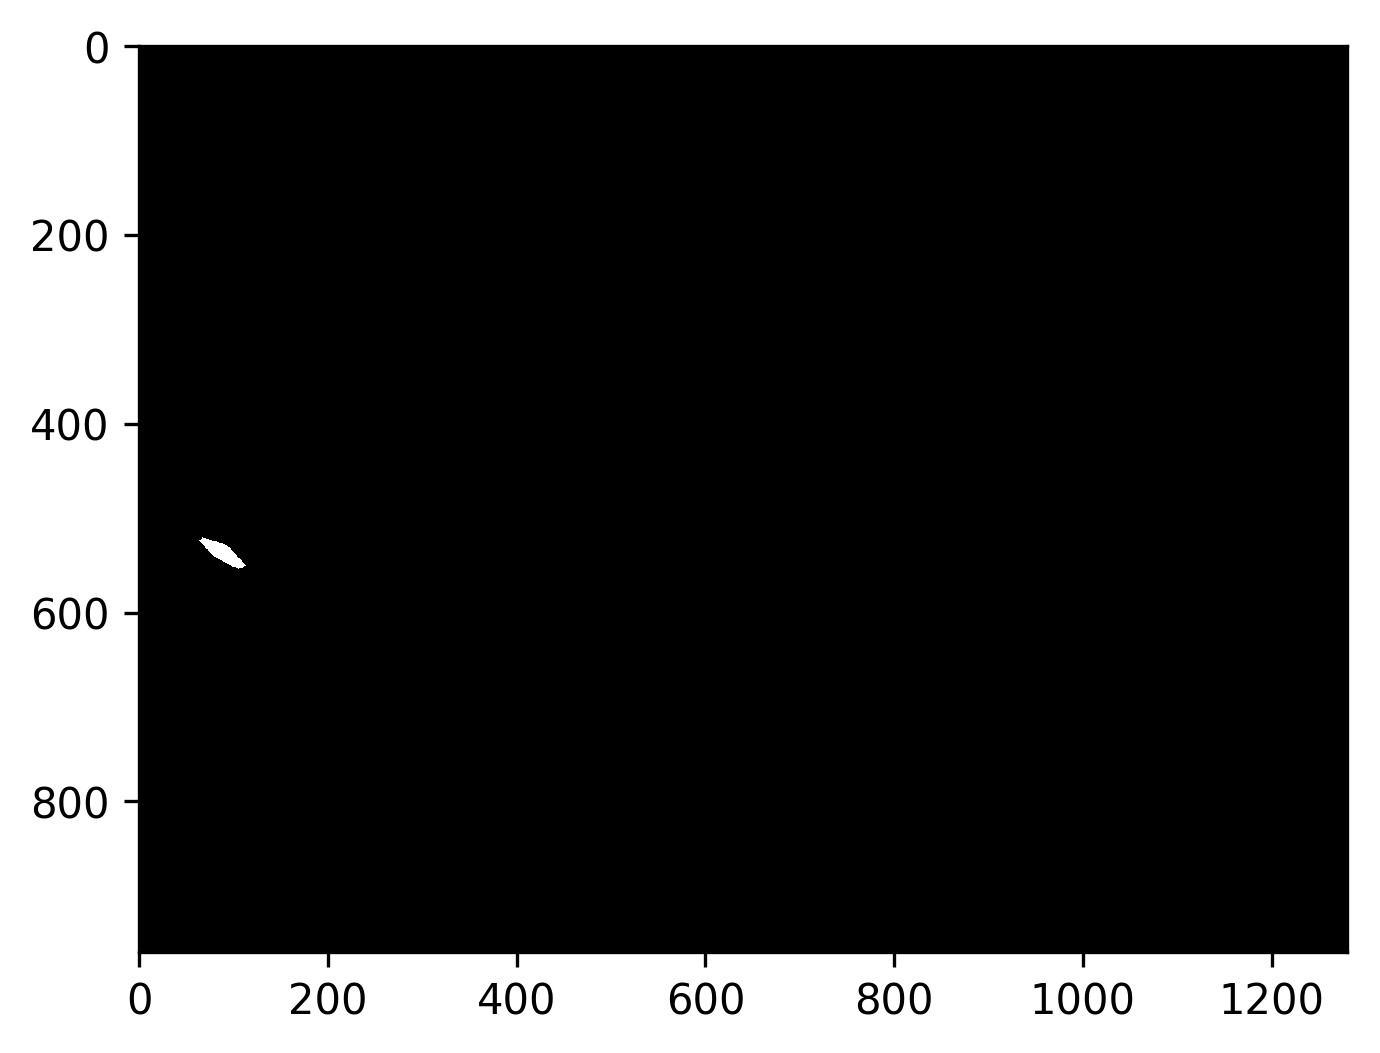

In [46]:
thr_val = np.max(img_1) * 0.95
_, thr = cv2.threshold(img_1, thr_val, 255, cv2.THRESH_BINARY)
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
ax.imshow(thr, cmap="gray")

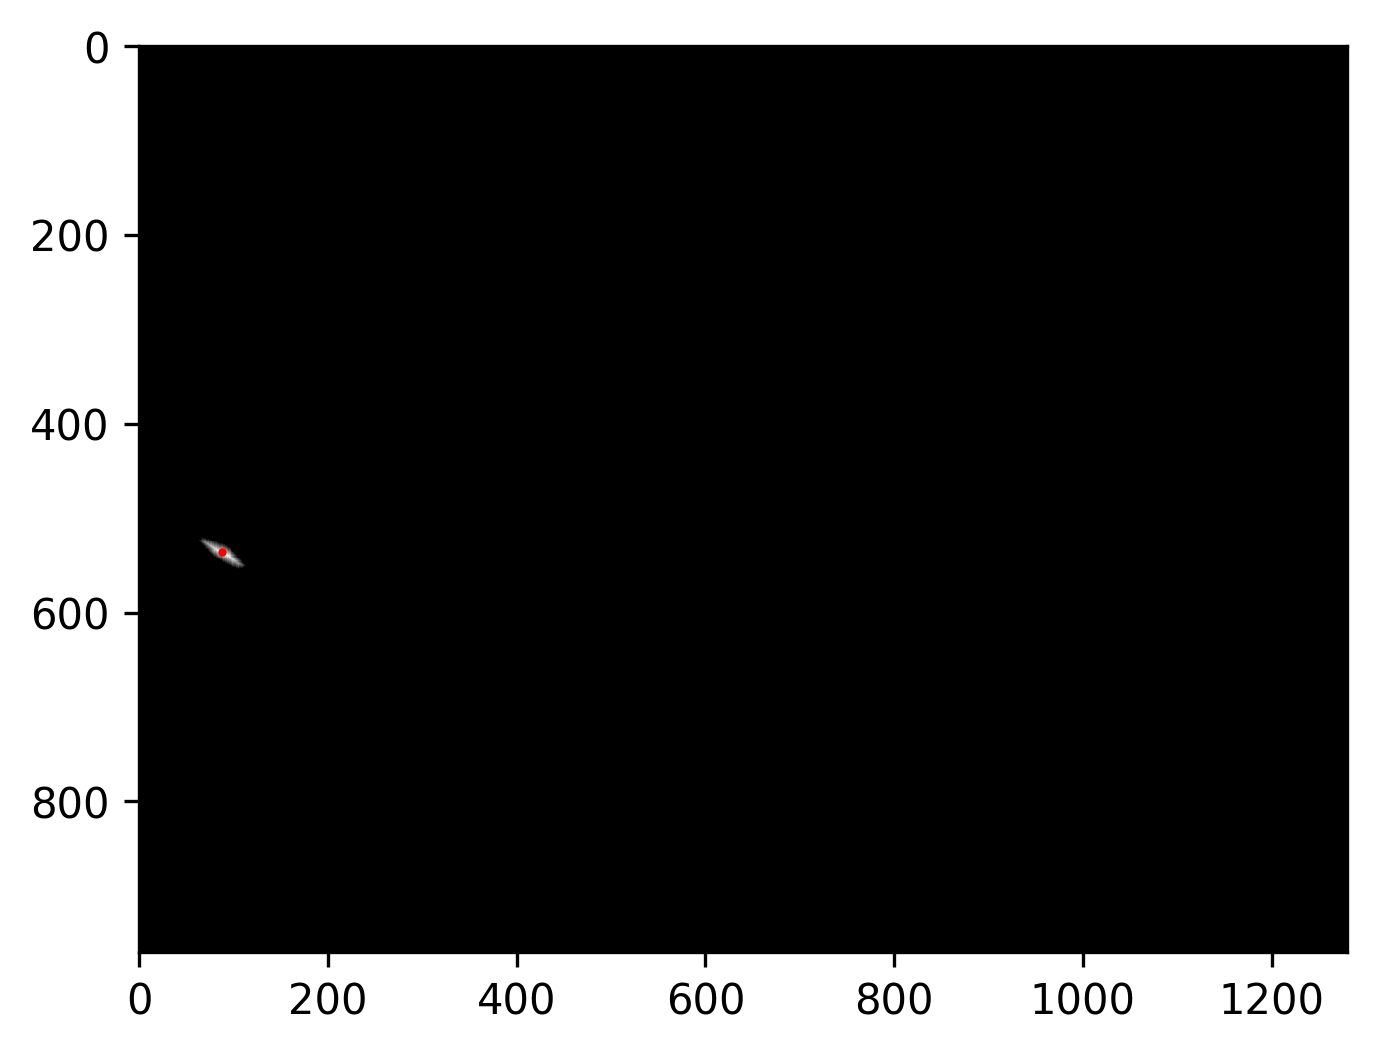

In [47]:
dist = cv2.distanceTransform(thr, distanceType=cv2.DIST_L1, maskSize=3)
min_ind = np.unravel_index(np.argmax(dist), dist.shape)
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
ax.scatter(min_ind[1], min_ind[0], c="red", s=1)
ax.imshow(dist, cmap="gray")